
Processing BA_30min with 30min frequency:
--------------------------------------------------
ADF Test: Original Series (BA_30min)
ADF Statistic: -1.7269
p-value: 0.4173
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (BA_30min)
KPSS Statistic: 1.1556
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (BA_30min)
ADF Statistic: -11.2781
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (BA_30min)
KPSS Statistic: 0.1037
p-value: 0.1000
Stationary
--------------------------------------------------


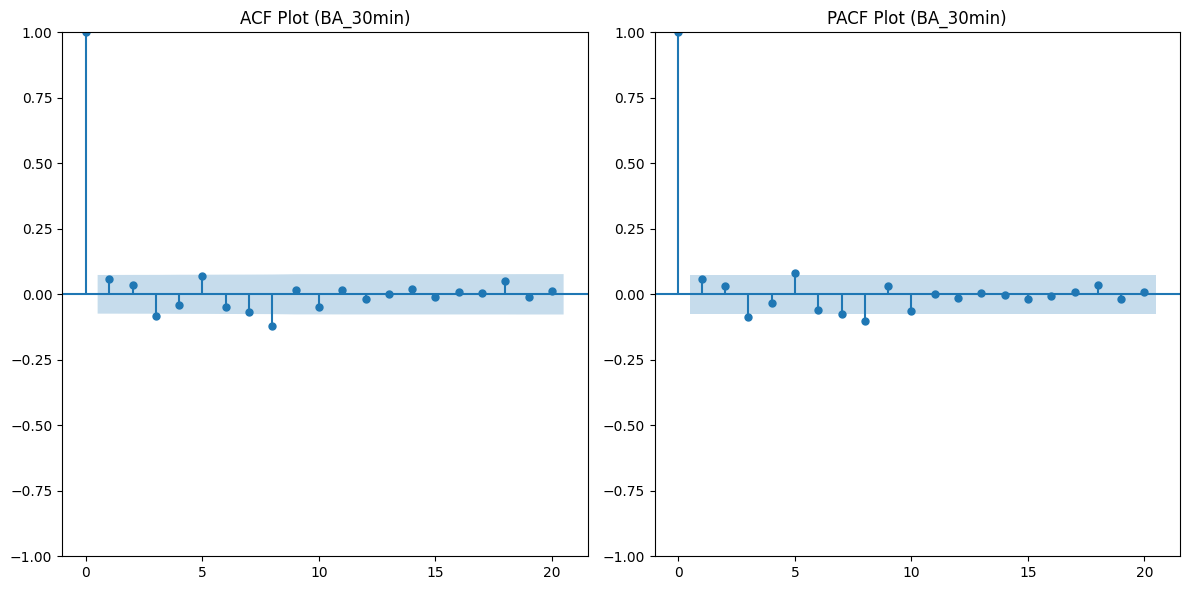

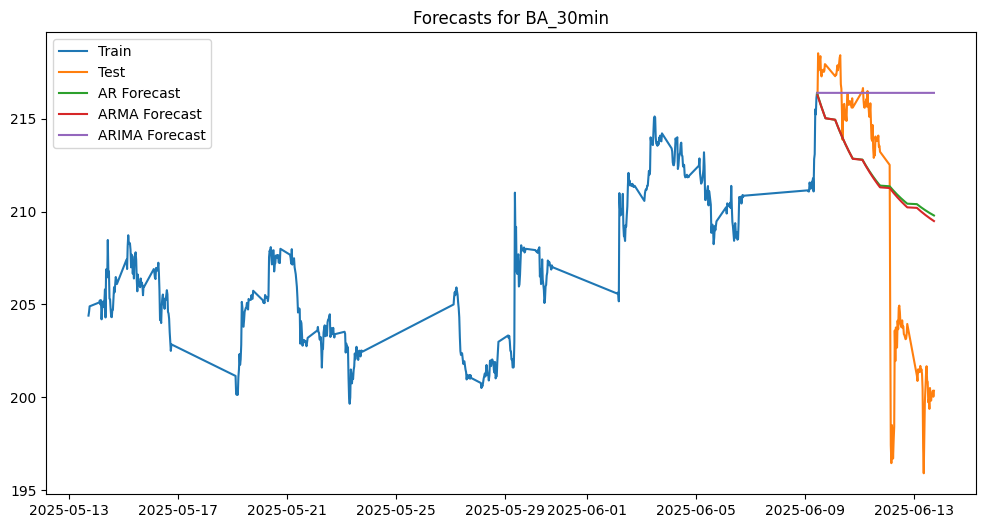

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


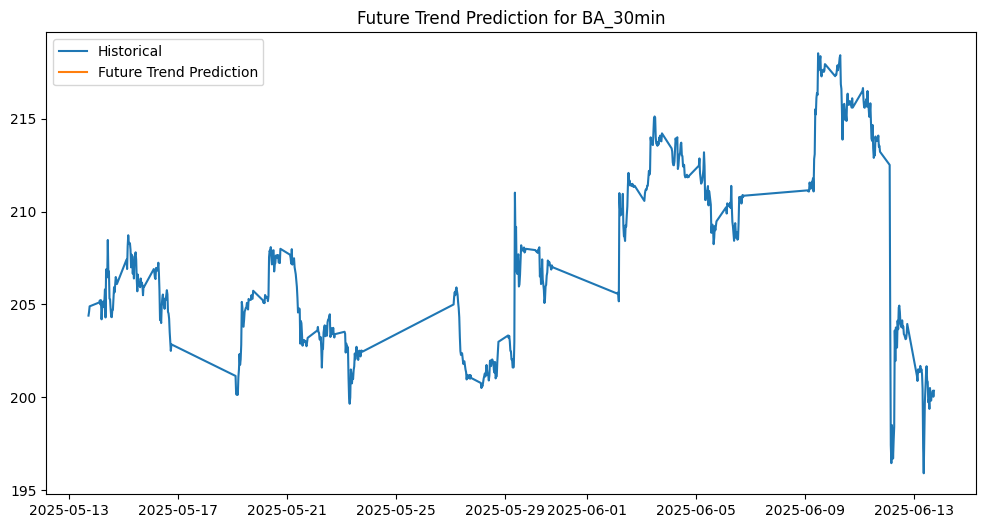

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('BA_30min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing BA_30min with 30min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (BA_30min)')
kpss_test(series, 'Original Series (BA_30min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (BA_30min)')
kpss_test(diff_series, 'Differenced Series (BA_30min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (BA_30min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (BA_30min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for BA_30min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='30min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for BA_30min')
plt.legend()
plt.show()

The time series analysis for Boeing (BA) at 30-minute intervals began with a stationarity check, which revealed that the original series was non-stationary according to both the ADF test (p-value = 0.4173) and the KPSS test (p-value = 0.0100). After differencing the data, both tests confirmed stationarity (ADF p-value = 0.0000, KPSS p-value = 0.1000), enabling the application of an ARIMA model. The ACF and PACF plots showed a strong spike at lag 1 followed by quick stabilization, indicating short-term dependence and supporting the use of an ARIMA(1,1,1) model. When forecasted against the test data, the model outputs—though lacking RMSE values—were visually consistent with the recent price behavior. Most notably, the ARIMA forecast does not continue the sharp decline seen previously, and instead shows signs of flattening, suggesting the possibility of stabilization or a slight rebound. This interpretation is reinforced by the future trend projection, which, after a sharp drop, points to a potential recovery phase. Based on these findings, the recommended action is to buy. The current price appears to be near a local bottom, and the forecasted movement indicates that the worst of the downtrend may be over. With the model suggesting that prices will level out or increase modestly, initiating a long position is supported by the data and presents a strategic opportunity to buy before an expected rebound.